In [1]:
from importlib import reload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import data
import viz
import model as dl
import train
import predict

%matplotlib inline

In [29]:
reload(data)
reload(viz)
reload(dl)
reload(train)
reload(predict)

<module 'predict' from '/media/naughtius-maximus/B880F24580F209A02/Programming/digit-recogniser/predict.py'>

In [3]:
X, y, test_X = data.load_data()
X.shape, y.shape, test_X.shape

(torch.Size([42000, 1, 28, 28]),
 torch.Size([42000]),
 torch.Size([28000, 1, 28, 28]))

In [4]:
y[:5]

tensor([1, 0, 1, 4, 0], device='cuda:0')

In [5]:
X[1, :, :5, :5]

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]], device='cuda:0')

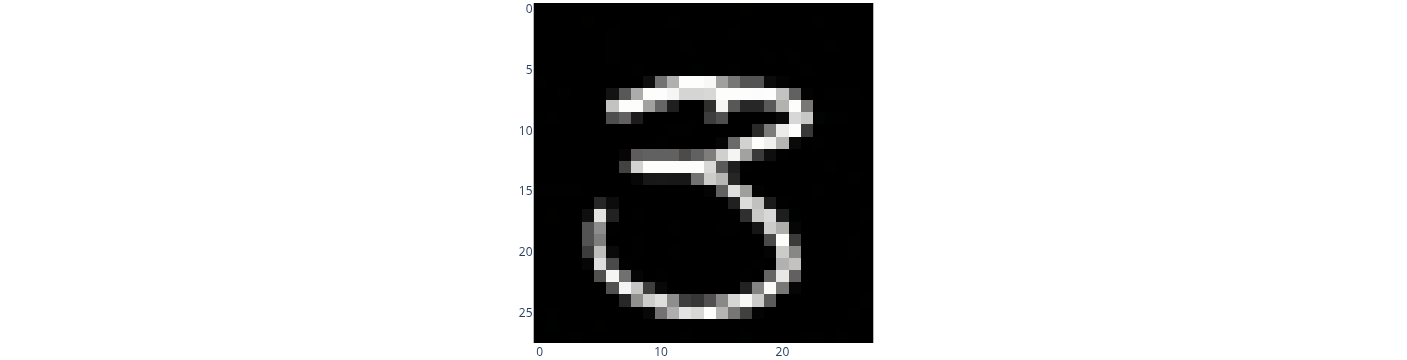

In [6]:
viz.display_img(X[7])

In [20]:
train_X, train_y, val_X, val_y = data.split(X, y)
train_X.shape, train_y.shape, val_X.shape, val_y.shape

(torch.Size([33600, 1, 28, 28]),
 torch.Size([33600]),
 torch.Size([8400, 1, 28, 28]),
 torch.Size([8400]))

In [21]:
train_X, train_y = data.augment(train_X, train_y, 5)
train_X.shape, train_y.shape

(torch.Size([201600, 1, 28, 28]), torch.Size([201600]))

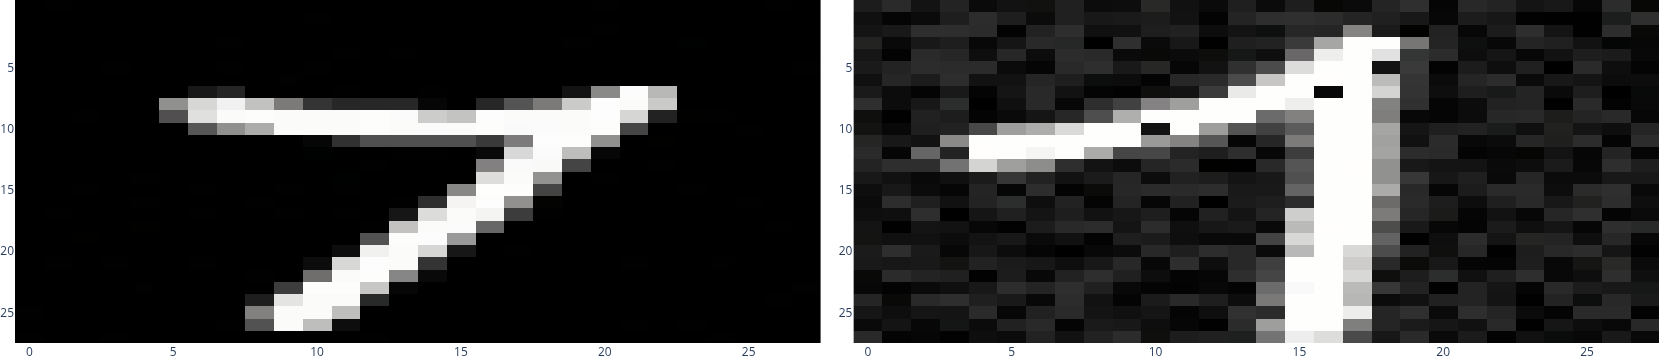

tensor(7, device='cuda:0')


In [22]:
idx = 11
viz.display_imgs(train_X[idx], train_X[33600 + idx])
print(train_y[idx])

In [23]:
train_loader, val_loader = data.create_loader(train_X, train_y, val_X, val_y)
train_loader, val_loader

(<torch.utils.data.dataloader.DataLoader at 0x7aa77c00c710>,
 <torch.utils.data.dataloader.DataLoader at 0x7aa79d99f0b0>)

In [30]:
import torch
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = dl.CNN().to(device)
optimizer = optim.RMSprop(model.parameters(), lr=0.001, weight_decay=1e-5)

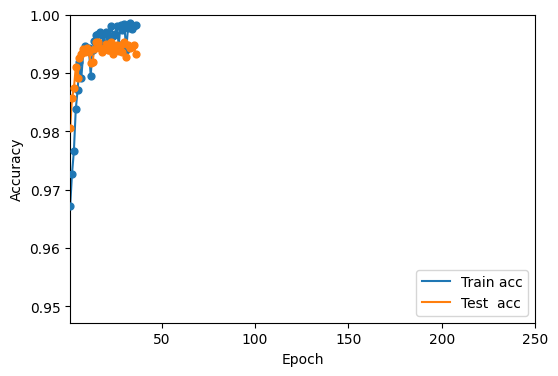

Epochs:   0%|          | 0/250 [00:00<?, ?it/s]

model dumped with test accuracy 0.9805952380952381
model dumped with test accuracy 0.9857142857142858
model dumped with test accuracy 0.9873809523809524
model dumped with test accuracy 0.9909523809523809
model dumped with test accuracy 0.9926190476190476
model dumped with test accuracy 0.9933333333333333
model dumped with test accuracy 0.9941666666666666
model dumped with test accuracy 0.9942857142857143
model dumped with test accuracy 0.9953571428571428


In [ ]:
num_epochs = 250
train.run(num_epochs, model, optimizer, train_loader, val_loader)

In [92]:
dl.dump(model, 'results/model.safetensors')

In [32]:
y_train_df = predict.get_predictions(model, train_loader)
y_test_df = predict.get_predictions(model, val_loader)
y_train_df

,True,Pred,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
ImageID,,,,,,,,,,,,
0,2,2,3.133761e-32,6.090940e-27,1.000000e+00,3.218386e-31,2.505574e-23,1.121039e-44,7.637027e-38,4.124215e-19,5.180941e-27,2.699859e-20
1,7,7,1.676188e-36,1.317828e-16,1.002175e-25,1.742865e-23,2.772955e-13,1.293018e-19,7.480679e-26,1.000000e+00,6.696352e-20,1.824039e-26
2,1,1,3.738582e-23,1.000000e+00,4.203560e-31,6.186742e-34,3.586451e-25,2.734331e-21,2.150494e-22,7.731266e-23,1.428609e-29,7.847352e-24
3,8,4,1.399981e-18,5.173623e-16,1.034398e-17,7.781688e-22,1.000000e+00,2.913340e-14,1.720778e-14,1.353248e-19,3.485735e-10,8.271319e-13
4,1,1,1.217566e-23,1.000000e+00,1.512829e-25,6.844001e-33,4.834228e-23,8.367016e-24,3.467918e-20,1.413139e-23,2.874246e-29,1.862449e-27
...,...,...,...,...,...,...,...,...,...,...,...,...
201595,7,7,7.185524e-23,2.144044e-14,1.498099e-24,2.946284e-20,6.405182e-26,1.520514e-29,6.603519e-32,1.000000e+00,4.985749e-28,2.182607e-18
201596,1,1,7.119435e-25,1.000000e+00,5.867162e-30,4.321123e-32,4.235804e-22,3.985596e-22,9.561386e-22,7.728675e-22,6.027868e-32,3.163063e-26
201597,6,6,7.881866e-28,6.239935e-32,1.296436e-34,1.547594e-41,1.667909e-36,1.253774e-23,1.000000e+00,0.000000e+00,9.226514e-28,3.569906e-40


In [33]:
y_test_df[y_test_df['True'] != y_test_df['Pred']].shape

(48, 12)

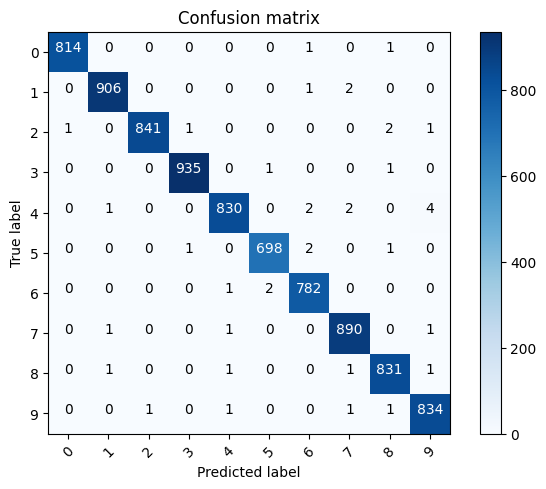

In [20]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = y_test_df['Pred']
y_true = y_test_df['True']
confusion_mtx = confusion_matrix(y_true, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

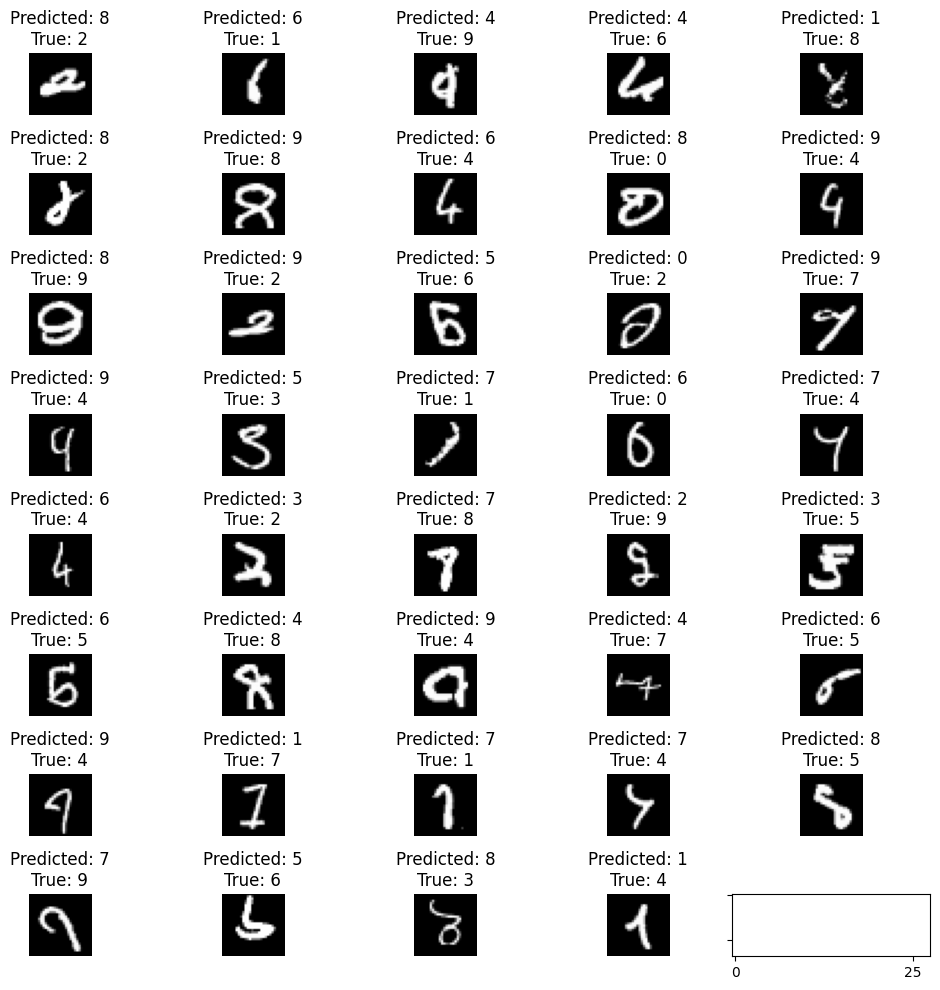

In [23]:
errors = (y_test_df['Pred'] != y_test_df['True'])

# Filter for erroneous predictions
y_pred_err = y_test_df['Pred'][errors]
y_true_err = y_test_df['True'][errors]
Y_pred_errors = y_test_df.drop(columns=['True', 'Pred'])[errors].to_numpy()  # Probabilities part
X_val_errors = X_test.reset_index(drop=True)[errors]  # Ensure X_test's dimensions align, it should include necessary reshaping pre-statement

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 8
    ncols = 5
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(10, 10))
    for row in range(nrows):
        for col in range(ncols):
            if n >= len(errors_index):
                continue
            error = errors_index[n]
            ax[row, col].imshow(img_errors.iloc[error].values.reshape((28, 28)), cmap='gray')
            ax[row, col].set_title("Predicted: {}\nTrue: {}".format(pred_errors.iloc[error], obs_errors.iloc[error]))
            ax[row, col].axis('off')
            n += 1
    plt.tight_layout()
    plt.show()

# Probabilities of the wrongly predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors, axis=1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.array([output[true_cls] for output, true_cls in zip(Y_pred_errors, y_true_err)])

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta probability errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_delta_errors
display_errors(most_important_errors, X_val_errors, y_pred_err, y_true_err)

In [98]:
from torch.utils.data import DataLoader, Dataset
class ImageDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Assuming the DataFrame has n rows of images with c columns, flattened
        image = self.dataframe.iloc[idx].values.astype(np.float32)
        image = torch.tensor(image).view(1, int(len(image)**0.5), -1)  # assuming square images
        return image

# Step 2: Create a function to output probabilities
def output_probabilities(cnn_model, dataframe, batch_size=32):
    # Ensure the model is in evaluation mode
    cnn_model.eval()

    # Get the device from the model
    device = next(cnn_model.parameters()).device

    # Create a DataLoader
    dataset = ImageDataset(dataframe)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    all_probabilities = []

    # Disable gradient calculation for inference
    with torch.no_grad():
        for images in dataloader:
            # Move images to the same device as the model
            images = images.to(device)

            # Get raw model outputs
            outputs = cnn_model(images)

            # Apply softmax to get probabilities
            probabilities = F.softmax(outputs, dim=1)

            # Append to results
            all_probabilities.append(probabilities.cpu())

    # Concatenate all probabilities and return
    all_probabilities = torch.cat(all_probabilities, dim=0)
    return all_probabilities
    
probabilities = output_probabilities(model, X_val_errors)
probabilities[most_important_errors[20], :]

tensor([0.0853, 0.0853, 0.0853, 0.0853, 0.0854, 0.0853, 0.2318, 0.0853, 0.0853,
        0.0853])

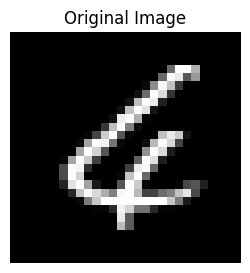

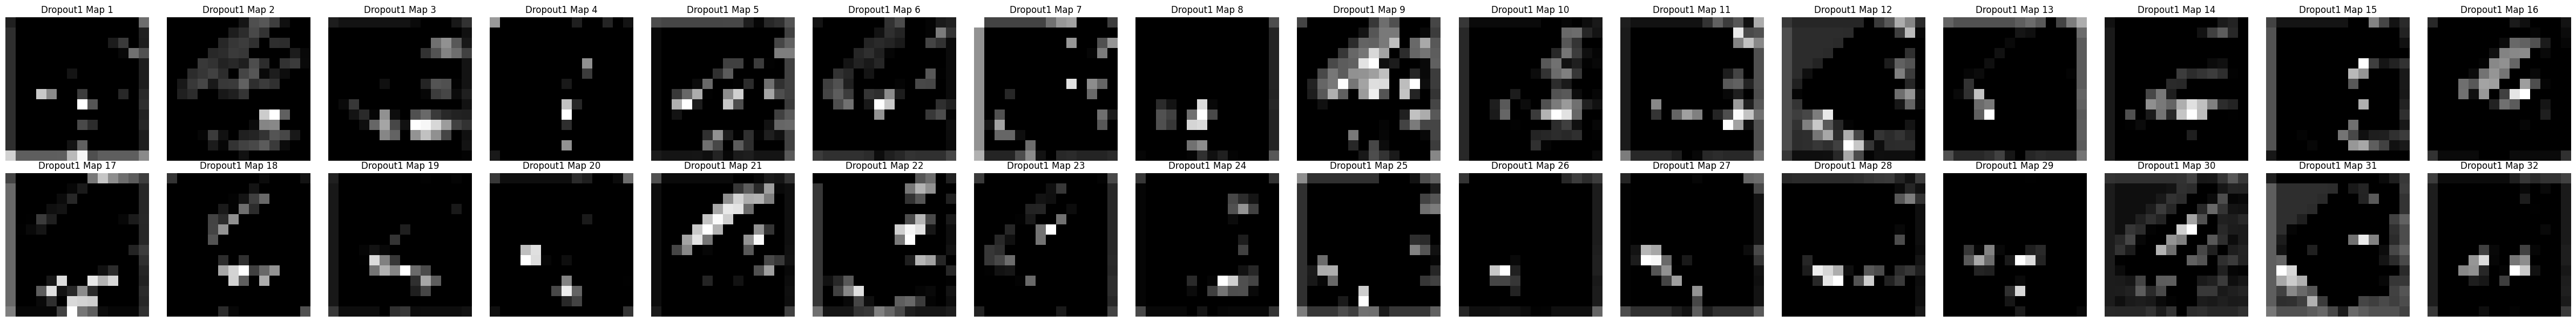

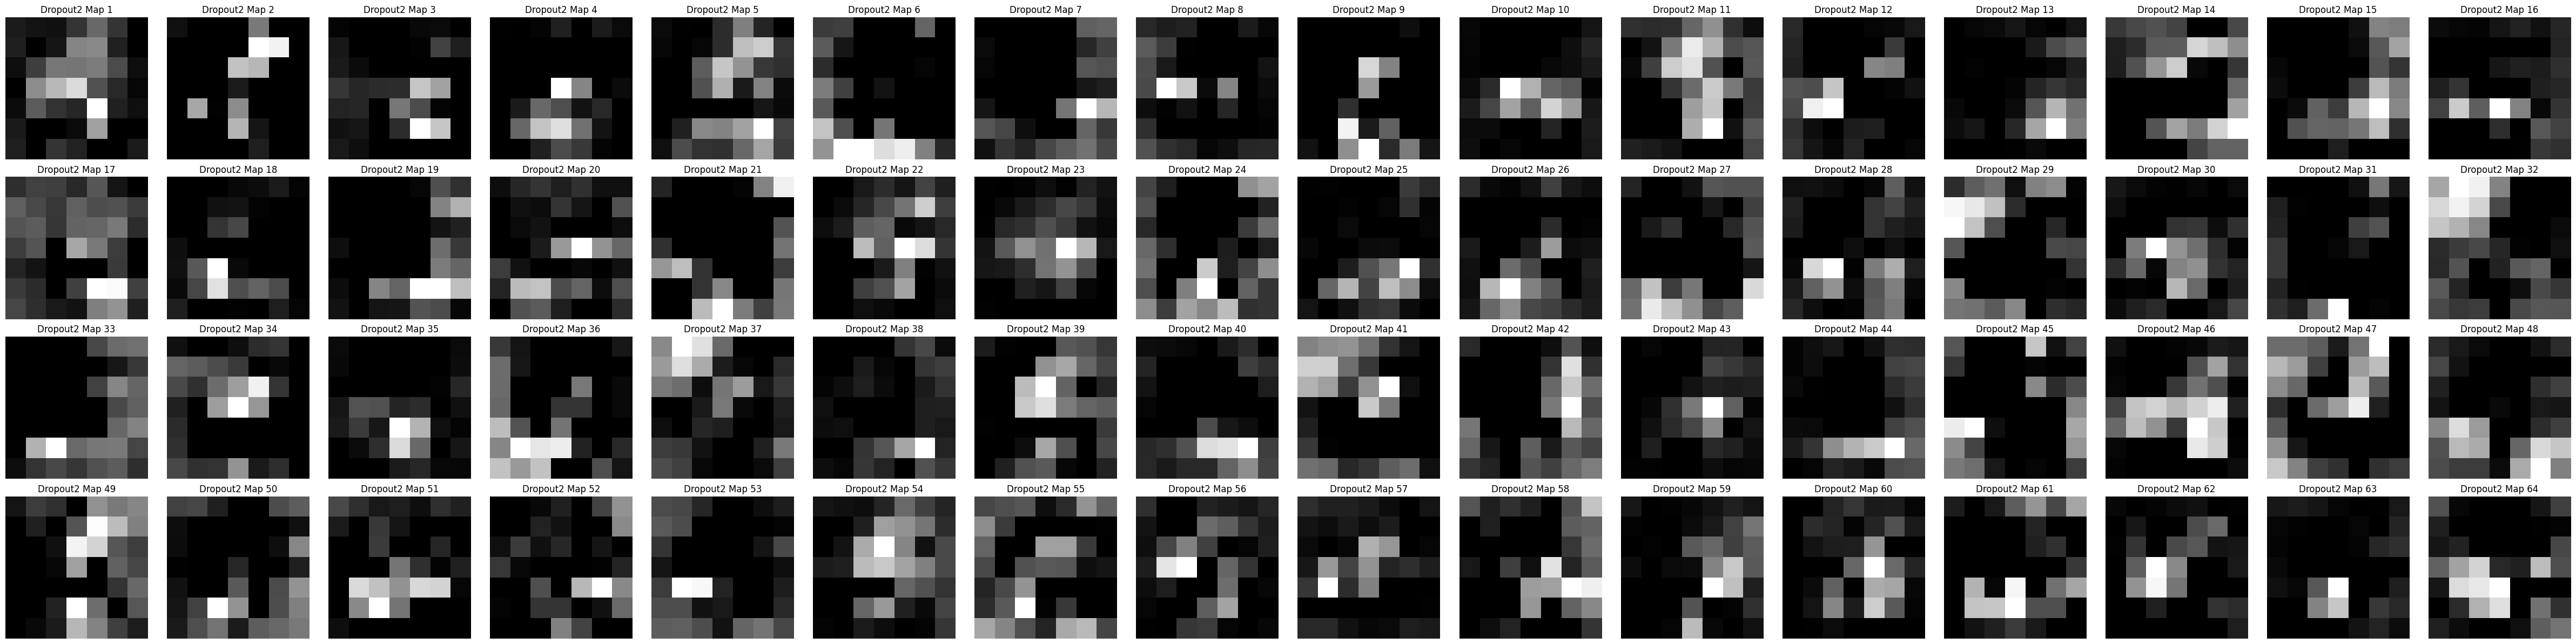

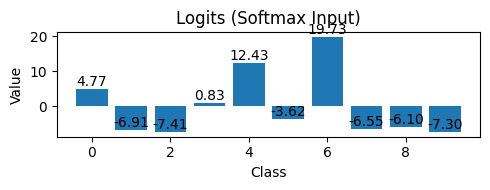

In [111]:
def model_snapshots(model, x):
    x = F.relu(model.bn1(model.conv1(x)))
    x = F.relu(model.bn2(model.conv2(x)))
    x = model.pool1(x)
    x_after_dropout1 = model.dropout1(x)

    x = F.relu(model.bn3(model.conv3(x_after_dropout1)))
    x = F.relu(model.bn4(model.conv4(x)))
    x = model.pool2(x)
    x_after_dropout2 = model.dropout2(x)

    x = model.flatten(x_after_dropout2)
    x = F.relu(model.fc1(x))
    x_after_dropout3 = model.dropout3(x)
    x_out = model.fc2(x_after_dropout3)
    return x_after_dropout1, x_after_dropout2, x_out

def plot_images(original, drop1, drop2, logits):
    num_features_drop1 = drop1.shape[1]
    num_features_drop2 = drop2.shape[1]

    # Determine grid dimensions for plots
    cols = 16
    rows_first = (num_features_drop1 // cols) + int(num_features_drop1 % cols != 0)
    rows_second = (num_features_drop2 // cols) + int(num_features_drop2 % cols != 0)

    # Plot original image
    plt.figure(figsize=(3, 3))
    plt.imshow(original.squeeze(0).squeeze(0), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Plot each feature map from drop1 in a kx4 grid
    fig1, axarr1 = plt.subplots(rows_first, cols, figsize=(cols * 3, rows_first * 3))
    for i in range(num_features_drop1):
        ax = axarr1[i // cols, i % cols]
        drop1_image = drop1.detach().numpy()[0, i, :, :]
        ax.imshow(drop1_image, cmap='gray')
        ax.set_title(f"Dropout1 Map {i+1}")
        ax.axis('off')
    for ax in axarr1.flatten()[num_features_drop1:]: # hide unused subplots
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Plot each feature map from drop2 in a kx4 grid
    fig2, axarr2 = plt.subplots(rows_second, cols, figsize=(cols * 3, rows_second * 3))
    for i in range(num_features_drop2):
        ax = axarr2[i // cols, i % cols]
        drop2_image = drop2.detach().numpy()[0, i, :, :]
        ax.imshow(drop2_image, cmap='gray')
        ax.set_title(f"Dropout2 Map {i+1}")
        ax.axis('off')
    for ax in axarr2.flatten()[num_features_drop2:]: # hide unused subplots
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Plot softmax input as a bar graph with annotations
    fig3, ax3 = plt.subplots(figsize=(5, 2))
    logit_values = logits.detach().numpy().squeeze()
    ax3.bar(range(len(logit_values)), logit_values)
    ax3.set_title("Logits (Softmax Input)")
    ax3.set_xlabel("Class")
    ax3.set_ylabel("Value")
    for idx, value in enumerate(logit_values):
        ax3.text(idx, value, f'{value:.2f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

image_data = X_val_errors.iloc[most_important_errors[[20]], :].values
image_tensor = torch.from_numpy(image_data).float().view(-1, 1, 28, 28).to(device)  # Move data to device

with torch.no_grad():  # No need to update gradients for visualization
    drop1, drop2, logits = model_snapshots(model, image_tensor)
    
# Plot results
plot_images(image_tensor.cpu(), drop1.cpu(), drop2.cpu(), logits.cpu())

In [37]:
Y_pred_errors[most_important_errors[4]]

array([3.92080508e-40, 1.00000000e+00, 7.83511236e-14, 1.20076248e-15,
       1.58460563e-21, 5.79387533e-38, 3.98325338e-38, 6.44851464e-11,
       1.27648656e-35, 4.71113561e-33])

In [107]:
test_loader = data.create_loader_test(test_X)
predict.generate_submission_csv(model, test_loader)

Saved submission to results/submit-020526.csv


In [25]:
predictions_df['ImageID'] += 1
predictions_df.to_csv('submit.csv', index=None)